In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, recall_score  # Updated imports
from sklearn.feature_selection import RFE
import pyswarm
import matplotlib.pyplot as plt
from IPython.display import Image, display
from google.colab import files
print('Libraries imported successfully.')

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=7b80b9879d594d1edb8929441a9b7876a7460b98d8ab12afa0289c9f68a88e2b
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
Libraries imported successfully.


In [2]:
# Upload the parkinsons.data file
uploaded = files.upload()
parkinsons_data = pd.read_csv('parkinsons.data')

Saving parkinsons.data to parkinsons.data


In [3]:
pd.set_option("display.max_columns", None)
print('Data loaded successfully. Shape of the dataset:', parkinsons_data.shape)
print('First 5 rows of the dataset:\n', parkinsons_data.head())
print('Shape of the dataset:', parkinsons_data.shape)
parkinsons_data.info()
print('Dataset info displayed (column names, data types, and non-null counts).')
print('Missing values in each column:\n', parkinsons_data.isnull().sum())
print('Statistical measures of the dataset:\n', parkinsons_data.describe())
print('Distribution of target variable (status):\n', parkinsons_data['status'].value_counts())
print('Mean values grouped by status:\n', parkinsons_data.groupby('status').mean(numeric_only=True))

Data loaded successfully. Shape of the dataset: (195, 24)
First 5 rows of the dataset:
              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer

In [5]:
# Feature and target separation
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
y = parkinsons_data['status']
print('Features (X) and target (y) separated. X shape:', X.shape, 'y shape:', y.shape)

Features (X) and target (y) separated. X shape: (195, 22) y shape: (195,)


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Data split into training and test sets. X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)

Data split into training and test sets. X_train shape: (136, 22) X_test shape: (59, 22)


In [7]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Data standardized. First 5 rows of X_train:\n', X_train[:5])

Data standardized. First 5 rows of X_train:
 [[-0.54710467 -0.3015979  -1.19158476  0.58411131  0.66920241  0.54755756
   0.38660898  0.54647689  0.88359209  0.84177398  0.96588819  0.43613322
   0.63719939  0.96588479  0.10174981 -0.6209075   0.39100103  0.32429756
   0.39283275 -0.00776054  0.59267709  0.37430076]
 [ 1.94992117  0.448904    2.36611823 -0.65118848 -0.90675478 -0.54390762
  -0.57915776 -0.54395573 -0.70285923 -0.66114887 -0.59005252 -0.6900595
  -0.78954301 -0.59036021 -0.46312262  0.25565833 -1.86304516 -1.14834364
  -1.44615685 -1.506426    0.03479297 -1.20270259]
 [ 1.74551598  0.36630009 -0.13302105 -0.76131922 -0.90675478 -0.64258803
  -0.71619223 -0.6426329  -0.70630162 -0.70826244 -0.67447638 -0.58384437
  -0.73418344 -0.67417896 -0.53208835  0.63670987 -1.85957284 -0.63351528
  -1.44938166 -2.6033621  -0.70325685 -1.23986022]
 [-1.28585478 -0.97874839 -0.58133397 -0.1170544   0.40654288 -0.17908912
  -0.13216437 -0.1791492   0.86097065  0.64389699  0.90597449  

In [8]:
# Feature selection with RFE (Wrapper Method)
initial_model = svm.SVC(kernel='linear')
rfe = RFE(estimator=initial_model, n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
selected_features = X.columns[rfe.support_].tolist()
print('RFE feature selection completed. Selected features:', selected_features)
print('Shape of X_train after RFE:', X_train_rfe.shape)

RFE feature selection completed. Selected features: ['MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:APQ', 'RPDE', 'DFA', 'spread1', 'spread2', 'PPE']
Shape of X_train after RFE: (136, 10)


In [9]:
# PSO optimization
def objective_function(params):
    C = params[0]
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_rfe, y_train)
    predictions = model.predict(X_train_rfe)
    return -accuracy_score(y_train, predictions)  # Negative because PSO minimizes

lb = [0.1]  # Lower bound for C
ub = [100]  # Upper bound for C
best_params, _ = pyswarm.pso(objective_function, lb, ub, swarmsize=10, maxiter=10)
optimal_C = best_params[0]
print('PSO optimization completed. Optimal C value:', optimal_C)

Stopping search: maximum iterations reached --> 10
PSO optimization completed. Optimal C value: 20.90134529109441


In [10]:
# Model training
model = svm.SVC(kernel='linear', C=optimal_C)
model.fit(X_train_rfe, y_train)
print('SVM model trained with optimized C.')

SVM model trained with optimized C.


In [11]:
# Training data evaluation
X_train_prediction = model.predict(X_train_rfe)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
training_data_f1 = f1_score(y_train, X_train_prediction)
training_data_recall = recall_score(y_train, X_train_prediction)

print('\nTraining Data Evaluation:')
print(f'Accuracy: {training_data_accuracy:.4f}')
print(f'F1-Score: {training_data_f1:.4f}')
print(f'Recall: {training_data_recall:.4f}')

# Test data evaluation
X_test_prediction = model.predict(X_test_rfe)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
test_data_f1 = f1_score(y_test, X_test_prediction)
test_data_recall = recall_score(y_test, X_test_prediction)

print('\nTest Data Evaluation:')
print(f'Accuracy: {test_data_accuracy:.4f}')
print(f'F1-Score: {test_data_f1:.4f}')
print(f'Recall: {test_data_recall:.4f}')


Training Data Evaluation:
Accuracy: 0.9191
F1-Score: 0.9458
Recall: 0.9600

Test Data Evaluation:
Accuracy: 0.8475
F1-Score: 0.9053
Recall: 0.9149


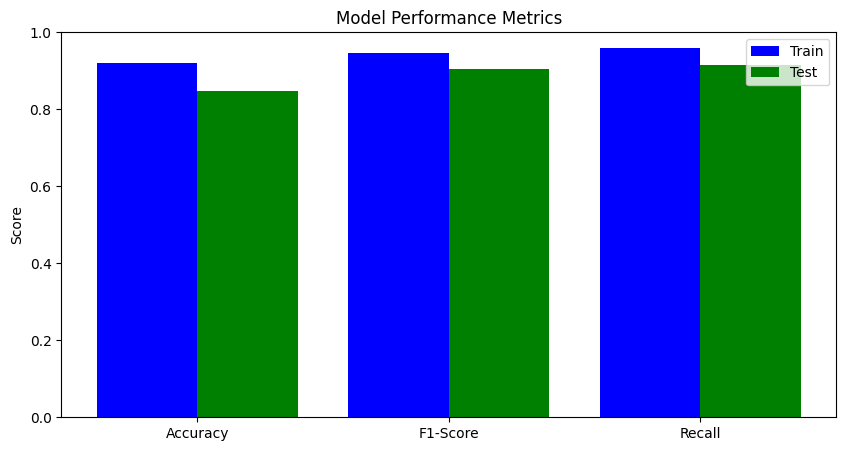

In [12]:
# Visualization
metrics = ['Accuracy', 'F1-Score', 'Recall']
train_metrics = [training_data_accuracy, training_data_f1, training_data_recall]
test_metrics = [test_data_accuracy, test_data_f1, test_data_recall]

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(metrics)) - 0.2, train_metrics, width=0.4, label='Train', color='blue')
plt.bar(np.arange(len(metrics)) + 0.2, test_metrics, width=0.4, label='Test', color='green')
plt.xticks(np.arange(len(metrics)), metrics)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [13]:
# Prediction on new data
def interpret_parkinsons_prediction(prediction):
    return "Parkinson's positive" if prediction == 1 else "Parkinson's negative"

input_data = (136.92600, 159.86600, 131.27600, 0.00293, 0.00002, 0.00118, 0.00153, 0.00355, 0.01259, 0.11200,
              0.00656, 0.00717, 0.01140, 0.01968, 0.00581, 25.70300, 0.460600, 0.646846, -6.547148, 0.152813,
              2.041277, 0.138512)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
std_data_rfe = rfe.transform(std_data)
prediction = model.predict(std_data_rfe)
result = interpret_parkinsons_prediction(prediction[0])
print('\nPrediction for input data:', result)


Prediction for input data: Parkinson's negative


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
# Save model and artifacts
import pickle
with open('parkinsondisease_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler_file.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('rfe_file.pkl', 'wb') as rfe_file:
    pickle.dump(rfe, rfe_file)
print('\nModel artifacts saved:')
print('- parkinsondisease_model.pkl (SVM model)')
print('- scaler_file.pkl (StandardScaler)')
print('- rfe_file.pkl (RFE feature selector)')


Model artifacts saved:
- parkinsondisease_model.pkl (SVM model)
- scaler_file.pkl (StandardScaler)
- rfe_file.pkl (RFE feature selector)
